In [3]:
# import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\abalone.csv")

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## EDA

In [7]:
#Print summary
print('shape             ------->',df.shape)
print('Each Column and data type and its count','\n')
print(df.info())

shape             -------> (4177, 9)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


We have 4177 rows and 9 columns Here Rings is our target variable(label).and rest are input(feature).

### Checking Missing Value

In [8]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no any missing value

In [9]:
#Dataframe statistics
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


seems no other cols have nulls its safe to proceed.

As we can see each feature data scaled diffrently.lets go ahed and scale the data

In [23]:
df = df.drop("Sex",axis=1)

In [24]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


There is no corelation in sex column.so we remove from df

In [25]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Principal Component Analysis (PCA)

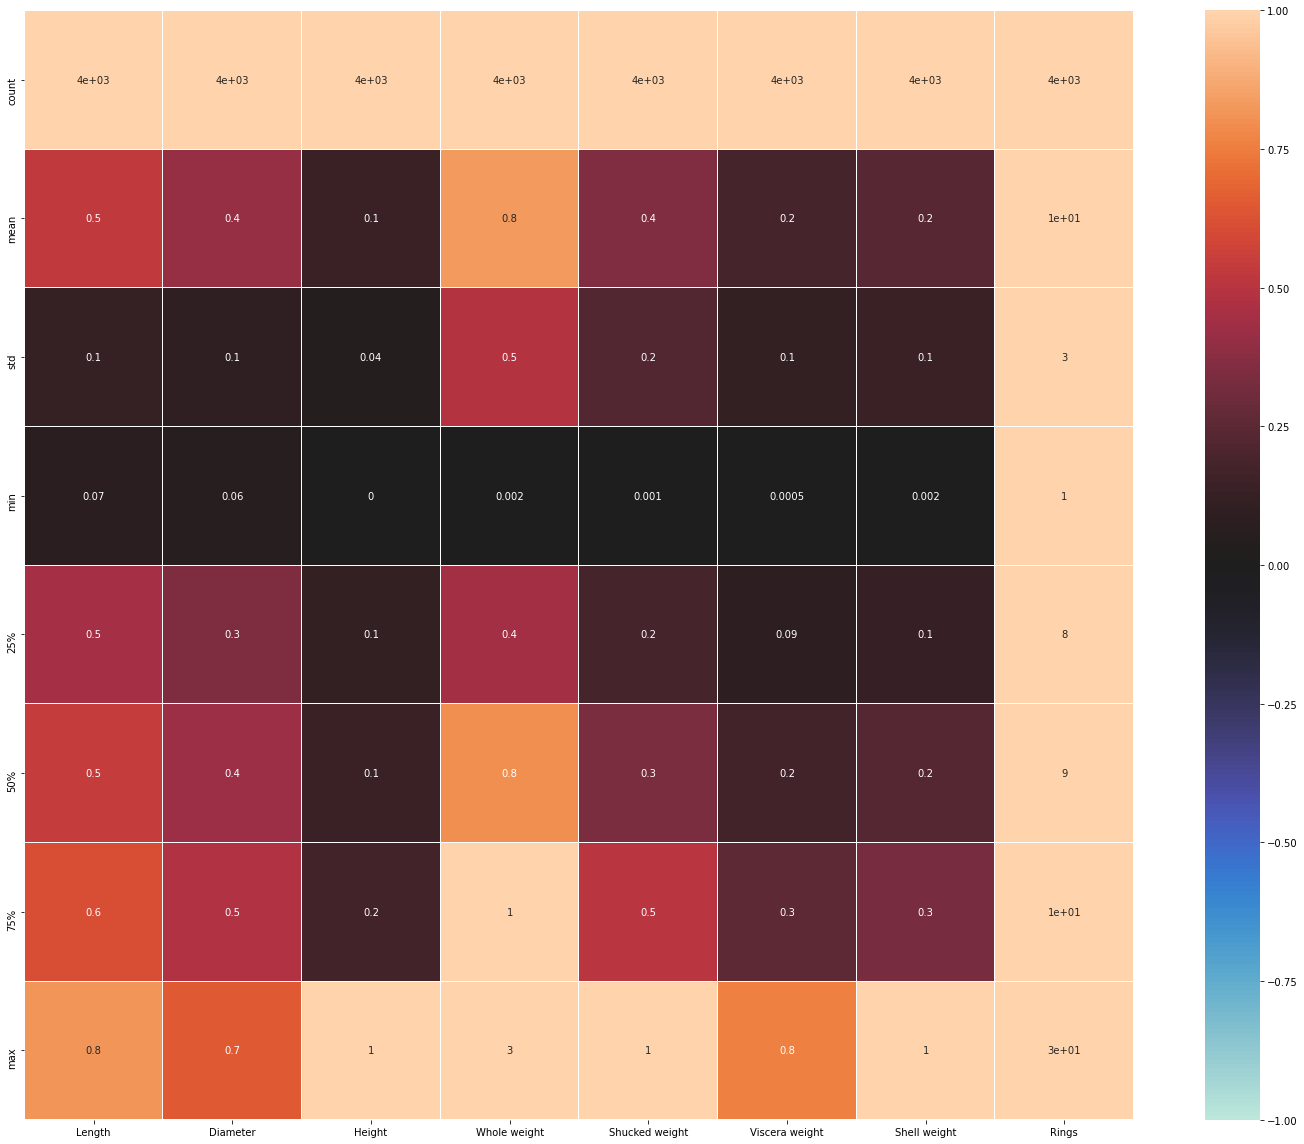

In [26]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,16))
sns.heatmap(df.describe(), vmin = -1,vmax=1, annot=True,
            square=True, center=0, fmt='.1g',linewidths=.1,)

plt.tight_layout()

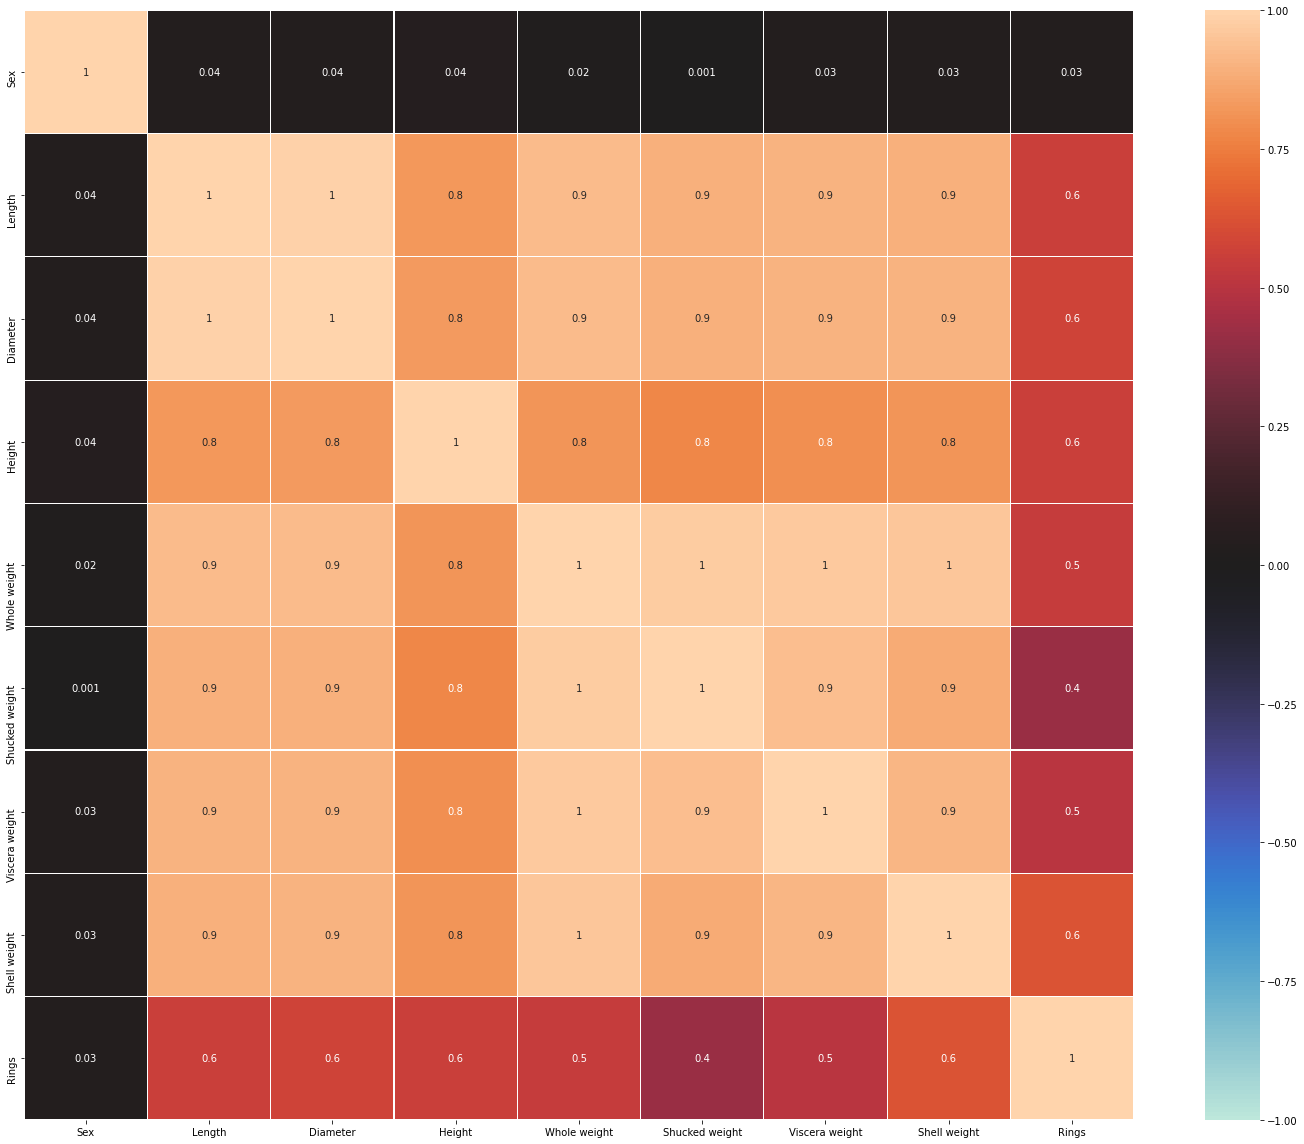

In [107]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,16))
sns.heatmap(df_corr, vmin = -1,vmax=1, annot=True,
            square=True, center=0, fmt='.1g',linewidths=.1,)

plt.tight_layout()

### Lets check the data distribution among all the columns

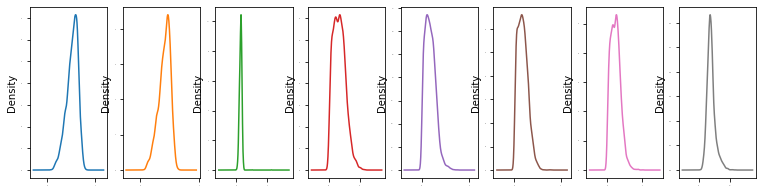

In [29]:
# Another example of multi variate analysis

df.plot(kind= 'density',subplots=True,layout=(6,11),sharex=False, legend=False, fontsize=1,figsize=(18,22))
plt.show()

All are in normal distribution

In [27]:
x = df.drop(columns = "Rings")
y = df["Rings"]

### Checking outliers

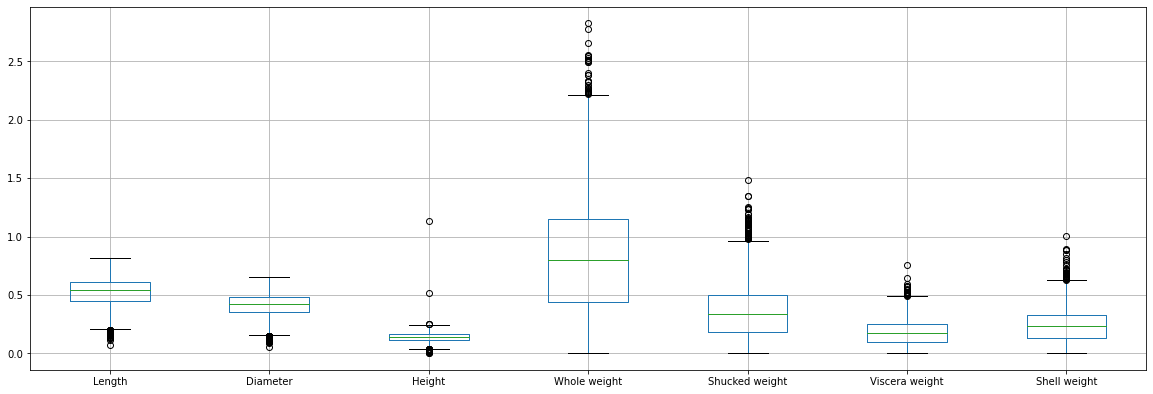

In [30]:
# Plotting boxplots
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

### Finding best random_state

In [58]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.2862838915470494 on Random_state 152


We have found best random_state value as 152 .we will create our train_test split this random_state(152)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state = maxRS)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.2862838915470494
[[  0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   4  10   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   4  14  16   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0  10  61  11   1   2   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   6  50  33  20   0   1   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   1  32  62  75  16   1   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0  14  32 116  38   8   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0  11  17  64  74  26   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   5   8  32  53  43   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   5   3  25  30  15   0   2   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   2   9  14  23  13   0   0   0   0   0   0   0   0   0
    0   0   0]
 [

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predlr = dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.19298245614035087
[[ 2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  4  4  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  6  5 11  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 12 23 25 11  5  1  1  3  2  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  1  6 19 32 22 13  9  1  1  1  2  1  0  0  0  2  0  0  0  0  0]
 [ 0  1  2 11 32 42 54 16 11  3  2  5  4  2  1  0  0  0  0  1  0  0]
 [ 0  0  0  4 15 38 51 37 27 12  9  3  4  1  2  3  1  0  0  0  1  0]
 [ 0  0  0  3  9 20 38 34 33 27  9  5  4  3  3  0  2  2  0  0  0  0]
 [ 0  0  0  2  3 13 19 29 30 11 16  3  4  3  3  2  1  1  0  0  1  0]
 [ 0  0  0  0  4  7 18 14 17  7  5  3  2  1  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  1  1  7 11 12  7  5  3  5  3  3  1  1  0  0  0  1  0]
 [ 0  0  0  0  2  2  5  4  5  3  5  4  3  2  1  1  0  1  0  0  0  1]
 [ 0  0  0  0  0  4  1  5  3  3  1  0  0  2  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  2  2  3  2  3  3  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0 

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predlr = rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.22807017543859648
[[ 1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  7  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  6  8 13  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13 26 30 10  3  2  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  8 18 35 26 16  5  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  8 34 53 64 11 11  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 15 41 62 53 21  6  5  1  2  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 24 45 51 46  9  5  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  8 33 39 34  8  6  2  4  1  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  5 10  7 20 24  7  3  0  2  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  3  3  5 12 20  8  5  2  0  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  3  9  9  4  3  1  1  3  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  2  6  3  3  2  2  0  0  2  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  3  3  3  4  0  0  0 

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svc = SVC()
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.30063795853269537
[[  0   1   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0  12   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0  17  13   4   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   8  18  50   7   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   4  10  57  25  13   0   1   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   1   3  42  77  51  11   2   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   1  19  43 100  36   7   2   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   1  12  20  65  64  28   2   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   5  16  29  45  42   4   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   6   7  22  25  18   2   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   2  11  17  18  12   1   0   0   0   0   0   0   0   0
    0   0   0]
 

### Cross validation

In [65]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=5)

print("Cross validation score of LogisticRegression model :",scr.mean())

Cross validation score of LogisticRegression model : 0.25975904650030085


In [66]:
scr = cross_val_score(dt,x,y,cv=5)

print("Cross validation score of DecisionTree model :",scr.mean())

Cross validation score of DecisionTree model : 0.1896126407472137


In [67]:
scr = cross_val_score(rf,x,y,cv=5)

print("Cross validation score of RandomForest model :",scr.mean())

Cross validation score of RandomForest model : 0.23558118213334098


In [68]:
scr = cross_val_score(svc,x,y,cv=5)

print("Cross validation score of SVC model :",scr.mean())

Cross validation score of SVC model : 0.27005443658138273


Minimum diffrence in accuracy and cross validation score is for RandomForestClassifier so this is our best model

#### Hyper parameter tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [85]:
# RandomForestClassifier

parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth': [4,5,6,7,8],
             'criterion': ['gini','entropy']}

In [75]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [80]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [81]:
GCV.best_params_ # printing the best parameter found by GridSearchCV

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [88]:
mod = RandomForestClassifier(criterion='entropy',max_features='sqrt',max_depth=6,n_estimators=200)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)

print(accuracy_score(y_test,pred)*100)

29.82456140350877


#### Saving the model

In [86]:
import joblib
joblib.dump(mod,'Abaline case Model.pk1')

['Abaline case Model.pk1']